In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dpath = "./data/sur/S8_BeforeIRRAD_200V_TestPulse_SpidrTime_18May_surrog_fitpars_perpix_NNsmoothingON.dat"
df = pd.read_csv(dpath, skiprows=3, names=['col','row', 'p0', 'p1', 'c', 't'], sep=" ")
sensor, second = dpath.split("/")[-1].split("_")[0:2]

In [3]:
df.head()## fit function ToT = f(q) =

col  row       p0        p1        c        t
0    0    0  5.15259  0.005470  6081.50  243.527
1    0    1  3.65710  0.005588  5928.65  427.109
2    0    2  3.53007  0.005567  5773.41  438.561
3    0    3  4.09026  0.005587  5012.92  624.960
4    0    4  4.79721  0.005269  6584.88  261.828

In [4]:
sur_mat = np.zeros((256,256,4))

In [5]:
for i, row in df.iterrows():
    sur_mat[int(row['col']),int(row['row'])] = [row['p0'],row['p1'],row['c'],row['t']]

In [6]:
max_tp_charge = 8000

In [7]:
## fit function ToT = f(q) = [p0 + p1*q - c/(q-t)]
def make_sur(p0, p1, c, t):
    return lambda x : p0 + p1*x - c/(x-t)

def make_lin(p0, p1, c, t):
    return lambda x : p0 + p1*x 
def make_asy(p0, p1, c, t):
    return lambda x : - c/(x-t)


In [79]:
x = np.linspace(900, max_tp_charge, 1000)

In [80]:
sur0 = make_lin(*sur_mat[0,0])
ylin =  sur0(x)

sur0 = make_asy(*sur_mat[0,0])
yasy =  sur0(x)

sur0 = make_sur(*sur_mat[0,0])
y =  sur0(x)

In [81]:
df2 = pd.read_csv("data/bin_map/EllipticIRRAD8.csv", skiprows=1, names=['col','row','bin'], sep=" ")

In [82]:
bin_map = np.zeros((256,256), dtype=np.int)

In [83]:
for i, row in df2.iterrows():
    bin_map[int(row['col']),int(row['row'])] = row['bin']

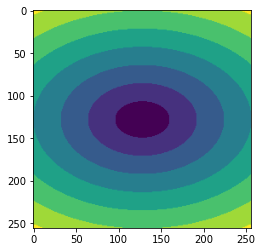

In [84]:
plt.imshow(bin_map)

In [85]:
badboysx = []
badboysy = []
suromap = []
linmap = []
asymap = []
binsused = np.unique(bin_map)
for bin_id in binsused:
    #bin_id=0
    xid, yid = np.where(bin_map == bin_id)
    ys = np.zeros((len(xid), len(x)))
    yl = np.zeros((len(xid), len(x)))
    ya = np.zeros((len(xid), len(x)))
    for i, pars in enumerate(sur_mat[xid,yid]):
        suro = make_sur(*pars)
        lin = make_lin(*pars)
        asy = make_asy(*pars)
        ys[i] = suro(x)
        yl[i] = lin(x)
        ya[i] = asy(x)
        if np.any(ys[i][0:87] > 60):
            print(pars)
            badboysx.append(xid[i])
            badboysy.append(yid[i])
    suromap.append(ys)
    linmap.append(yl)
    asymap.append(ya)


[2.29147e+00 4.83022e-03 4.15557e+03 9.20505e+02]
[2.51141e+00 5.20724e-03 4.13741e+03 9.21720e+02]
[2.24739e+00 5.07837e-03 3.95736e+03 9.28922e+02]
[2.26949e+00 5.35209e-03 3.48426e+03 1.13455e+03]
[2.85586e+00 4.80481e-03 3.52098e+03 9.07069e+02]
[2.32331e+00 5.21256e-03 4.28006e+03 9.17744e+02]
[2.94703e+00 4.99547e-03 3.50245e+03 9.22066e+02]
[2.74442e+00 4.83523e-03 3.70392e+03 9.11016e+02]
[2.52529e+00 4.75531e-03 4.15772e+03 9.13196e+02]
[2.44415e+00 4.78442e-03 4.03037e+03 9.04384e+02]
[3.16568e+00 4.84691e-03 3.51912e+03 9.06591e+02]
[2.82743e+00 4.77488e-03 3.42701e+03 9.41391e+02]
[2.67890e+00 4.78193e-03 3.41485e+03 9.34626e+02]
[2.79509e+00 4.89360e-03 3.85065e+03 9.02694e+02]
[2.51067e+00 5.22375e-03 3.71227e+03 9.10138e+02]
[2.40038e+00 5.15664e-03 3.58902e+03 9.14801e+02]
[1.46865e+00 5.41349e-03 4.21155e+03 9.03819e+02]
[2.55762e+00 4.86704e-03 3.50940e+03 9.15262e+02]
[2.85450e+00 5.42252e-03 3.92637e+03 9.21688e+02]
[2.66422e+00 5.15490e-03 3.76012e+03 9.23301e+02]


[2.19390e+00 5.26851e-03 3.86468e+03 9.51346e+02]
[2.71089e+00 5.01476e-03 3.80477e+03 9.07176e+02]
[2.40263e+00 4.90287e-03 3.35187e+03 9.00827e+02]
[1.68419e+00 5.14878e-03 3.51033e+03 1.00271e+03]
[2.08419e+00 4.57021e-03 3.72381e+03 9.05930e+02]
[2.85879e+00 4.83405e-03 3.46705e+03 9.28313e+02]
[2.58223e+00 4.74216e-03 3.34582e+03 9.42861e+02]
[2.83834e+00 4.56645e-03 3.06741e+03 9.73218e+02]
[3.15112e+00 4.69893e-03 3.51434e+03 9.03672e+02]
[2.97569e+00 4.63433e-03 3.23572e+03 9.33027e+02]
[3.06884e+00 4.75442e-03 3.47947e+03 9.08268e+02]
[2.19565e+00 4.65172e-03 3.25291e+03 9.75911e+02]
[2.73964e+00 5.05240e-03 3.89013e+03 9.44036e+02]
[2.20886e+00 4.48246e-03 3.70404e+03 9.20995e+02]
[2.82438e+00 5.00713e-03 3.69214e+03 9.49000e+02]
[3.08154e+00 4.67198e-03 3.49246e+03 9.00028e+02]
[2.47734e+00 4.70591e-03 3.20864e+03 9.91642e+02]
[3.08784e+00 4.59868e-03 3.22346e+03 9.50075e+02]
[1.83446e+00 4.91974e-03 3.43995e+03 9.06854e+02]
[1.48481e+00 5.35458e-03 3.60240e+03 9.34974e+02]


[3.20030e+00 4.67912e-03 2.93553e+03 9.66534e+02]
[2.10505e+00 4.96945e-03 2.83063e+03 1.24490e+03]
[2.69003e+00 4.97882e-03 3.61242e+03 9.04655e+02]
[2.85170e+00 4.88038e-03 3.61878e+03 9.16601e+02]
[3.00809e+00 4.84504e-03 3.73132e+03 9.12229e+02]
[2.92439e+00 4.67829e-03 3.60472e+03 9.76088e+02]
[3.78978e+00 4.52673e-03 3.22042e+03 9.04078e+02]
[3.03644e+00 4.86787e-03 4.04667e+03 9.17253e+02]
[3.01010e+00 4.37958e-03 2.86301e+03 9.69297e+02]
[2.72100e+00 4.65671e-03 3.31704e+03 1.02400e+03]
[3.65650e+00 4.53600e-03 3.20298e+03 9.17254e+02]
[3.04010e+00 4.54897e-03 3.39152e+03 9.24752e+02]
[3.39854e+00 4.55964e-03 4.09308e+03 9.50225e+02]
[2.75700e+00 4.45762e-03 3.11276e+03 1.17480e+03]
[3.13935e+00 4.52454e-03 3.60682e+03 9.57992e+02]
[2.83961e+00 4.62113e-03 3.02963e+03 9.65178e+02]
[3.35108e+00 4.79584e-03 3.90325e+03 9.14955e+02]
[3.04126e+00 4.86175e-03 3.37314e+03 9.62401e+02]
[2.88127e+00 4.81813e-03 3.42003e+03 9.73824e+02]
[3.14307e+00 4.83566e-03 3.66549e+03 9.03165e+02]


[3.11924e+00 5.34077e-03 3.98989e+03 9.00311e+02]
[3.08511e+00 5.04571e-03 4.20968e+03 9.17170e+02]
[2.82703e+00 4.77452e-03 3.81388e+03 9.00246e+02]
[2.53730e+00 5.22284e-03 3.79080e+03 9.07374e+02]
[2.52874e+00 4.85272e-03 3.69916e+03 9.45808e+02]
[2.33647e+00 4.93159e-03 3.95308e+03 9.07705e+02]
[2.53155e+00 4.56657e-03 3.45537e+03 9.63828e+02]
[2.45488e+00 4.89004e-03 3.96664e+03 9.61065e+02]
[3.23924e+00 4.85820e-03 3.62928e+03 9.22853e+02]
[2.12044e+00 5.21701e-03 4.06010e+03 9.38654e+02]
[3.04831e+00 4.73241e-03 3.52929e+03 9.40292e+02]
[3.41528e+00 4.56756e-03 3.38101e+03 9.15778e+02]
[2.34949e+00 5.32301e-03 3.83176e+03 9.31861e+02]
[2.68629e+00 4.95687e-03 3.77630e+03 9.26316e+02]
[2.33154e+00 5.43484e-03 4.07547e+03 9.20899e+02]
[2.50568e+00 5.31428e-03 3.75597e+03 9.62886e+02]
[2.85563e+00 4.73016e-03 3.58398e+03 9.32648e+02]
[3.22427e+00 4.67703e-03 3.40218e+03 9.40832e+02]
[3.22434e+00 4.58568e-03 3.56329e+03 9.14399e+02]
[3.08765e+00 4.76628e-03 3.73486e+03 9.29672e+02]


[1.56119e+00 4.90961e-03 3.36758e+03 9.37203e+02]
[1.91228e+00 4.64334e-03 3.51736e+03 9.18921e+02]
[2.23596e+00 4.84495e-03 3.49525e+03 9.34536e+02]
[2.41479e+00 4.75012e-03 3.83569e+03 9.12725e+02]
[2.72981e+00 4.57397e-03 3.27564e+03 9.04732e+02]
[2.06789e+00 4.79440e-03 3.50808e+03 9.47878e+02]
[1.19989e+00 4.55523e-03 3.75399e+03 9.12880e+02]
[1.88021e+00 4.46500e-03 3.08284e+03 9.53608e+02]
[2.62627e+00 4.74256e-03 3.53298e+03 9.09875e+02]
[1.49094e+00 4.56614e-03 3.45352e+03 9.01638e+02]
[1.42358e+00 4.62258e-03 3.52409e+03 9.72707e+02]
[2.35284e+00 4.99603e-03 3.58294e+03 9.25431e+02]
[2.79138e+00 4.92190e-03 3.65205e+03 9.20410e+02]
[1.41972e+00 5.13079e-03 3.24603e+03 1.22313e+03]
[3.25626e+00 4.48672e-03 4.23357e+03 9.05877e+02]
[2.87917e+00 4.69280e-03 3.88287e+03 9.00731e+02]
[2.76898e+00 4.68284e-03 3.74208e+03 9.02063e+02]
[2.81380e+00 4.58618e-03 3.43622e+03 9.41861e+02]
[3.01345e+00 4.75778e-03 3.76796e+03 9.36615e+02]
[3.26002e+00 4.71298e-03 3.93858e+03 9.28058e+02]


In [86]:
ys = suromap[0]

In [87]:
bmap = bin_map.copy()
bmap[:,:] = 0
bmap[badboysx, badboysy] = 9

In [55]:
256**2 - len(badboysx)

65536

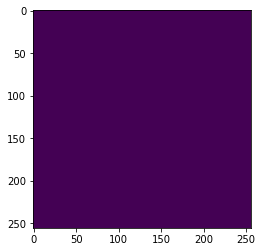

In [56]:
plt.imshow(bmap.T)

In [57]:
ys_max = np.max(ys, axis=0)
ys_min = np.max(ys, axis=0)
y_mid = np.mean(ys, axis=0)

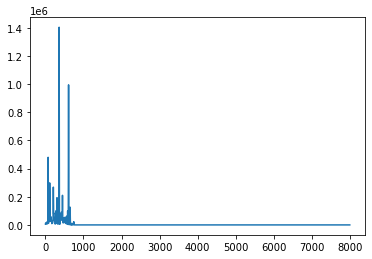

In [58]:
#plt.plot(x, ys_max)
#plt.plot(x, ys_min)
plt.plot(x, ys_max)

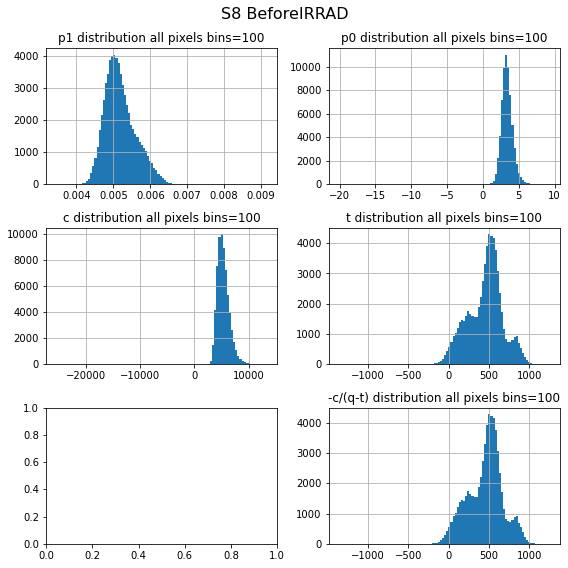

In [59]:
fig,axes = plt.subplots(3,2, figsize=(8,8))
fig.suptitle(sensor+ " " +second, fontsize=16)
ax = df['p1'].hist(ax=axes[0][0],bins=100)

ax.set_title("p1 distribution all pixels bins=100")

ax = df['p0'].hist(ax=axes[0][1],bins=100)

ax.set_title("p0 distribution all pixels bins=100")

ax = df['c'].hist(ax=axes[1][0],bins=100)

ax.set_title("c distribution all pixels bins=100")

ax = df['t'].hist(ax=axes[1][1],bins=100)

ax.set_title("t distribution all pixels bins=100")

ax = df['t'].hist(ax=axes[2][1],bins=100)

ax.set_title("-c/(q-t) distribution all pixels bins=100")

fig.tight_layout()
fig.savefig('{}_{}_surrogates.png'.format(sensor,second))

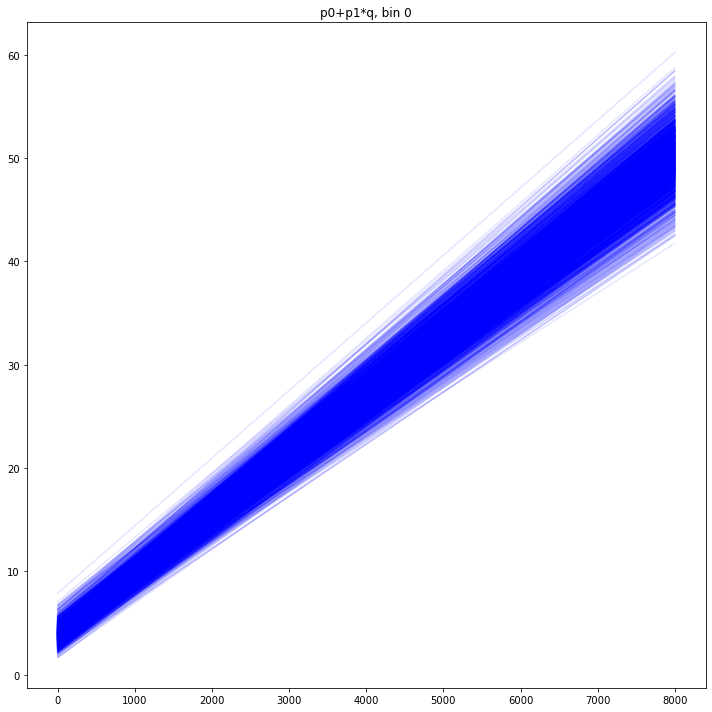

In [68]:
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(1, figsize=(10, 10))
b = 0
yl = linmap[0]
axes.set_title("p0+p1*q, bin 0")
for y in yl:
    axes.plot(x,y, color='blue', alpha=0.1)
fig.tight_layout()

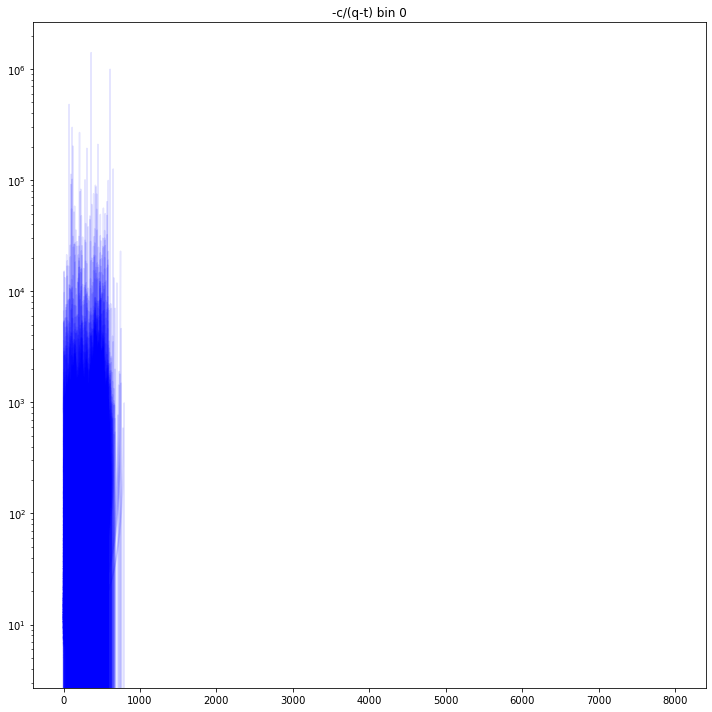

In [74]:
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(1, figsize=(10, 10))
b = 0
ya = asymap[0]
axes.set_title("-c/(q-t) bin 0")
for y in ya:
    axes.plot(x,y, color='blue', alpha=0.1)
#axes.set_ylim([-30,30000])
axes.set_yscale('log')
fig.tight_layout()

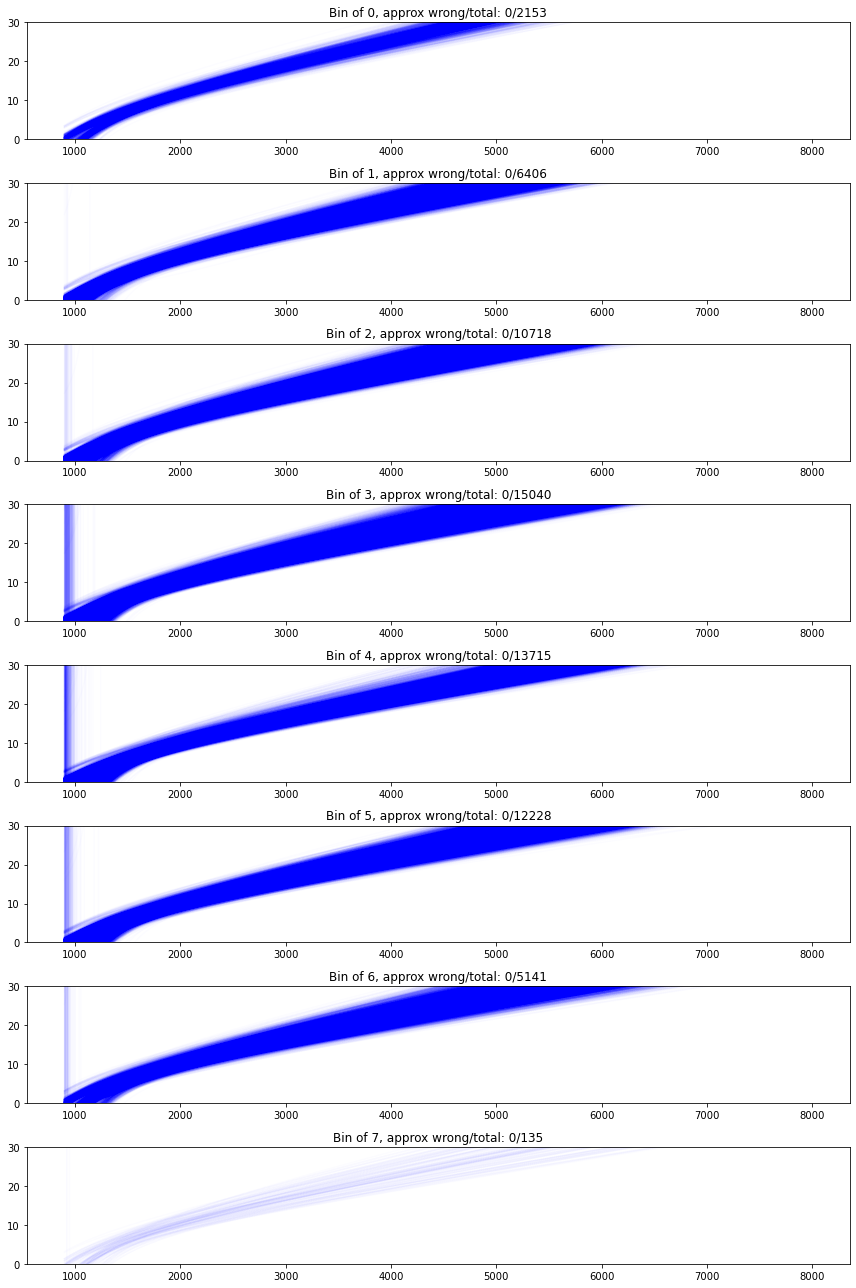

In [88]:
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(len(binsused), figsize=(12, 18))
for i,(b, ys) in enumerate(zip(binsused, suromap)):
    wrong = np.sum(np.any(yl[:,0:87]>60,axis=1))
    axes[i].set_title("Bin of {}, approx wrong/total: {}/{}".format(b, wrong, len(ys)))
    for y in ys:
        
        axes[i].plot(x,y, color='blue', alpha=0.01)
    axes[i].set_ylim([-0.01,30])
fig.tight_layout()
fig.savefig('{}_{}_surrogates.png'.format(sensor,second))